In [30]:
# 필요한 라이브러리 불러오기
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
sales = pd.read_csv('data/raw_sales.csv', parse_dates=['datesold'])
sales

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4
1,2007-02-27,2906,290000,house,3
2,2007-03-07,2905,328000,house,3
3,2007-03-09,2905,380000,house,4
4,2007-03-21,2906,310000,house,3
...,...,...,...,...,...
29575,2019-07-25,2900,500000,unit,3
29576,2019-07-25,2612,560000,unit,2
29577,2019-07-26,2912,464950,unit,2
29578,2019-07-26,2601,589000,unit,2


In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datesold      29580 non-null  datetime64[ns]
 1   postcode      29580 non-null  int64         
 2   price         29580 non-null  int64         
 3   propertyType  29580 non-null  object        
 4   bedrooms      29580 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [8]:
# 연도만 추출하여 새로운 열(year) 만들기
sales['year'] = sales['datesold'].dt.year
sales.head(1)

,datesold,postcode,price,propertyType,bedrooms,year
0,2007-02-07,2607,525000,house,4,2007


In [31]:
import numpy as np

# round 메소드 :
# groupby 메소드 : 
# agg 메소드 : 
result = np.round(sales.groupby('year')['price'].agg("mean"), 1)
result

year
2007    522377.2
2008    493814.2
2009    496092.0
2010    559564.8
2011    566715.1
2012    552501.4
2013    553416.3
2014    592653.8
2015    626101.3
2016    635185.3
2017    671880.6
2018    660701.0
2019    634184.2
Name: price, dtype: float64

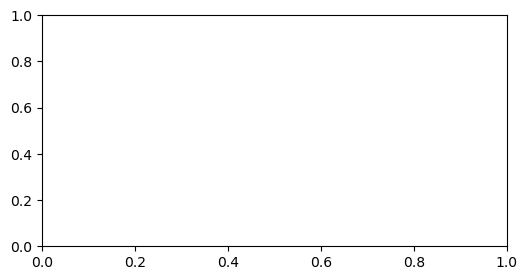

In [11]:
fig, ax = plt.subplots(figsize=(6, 3))
plt.show()

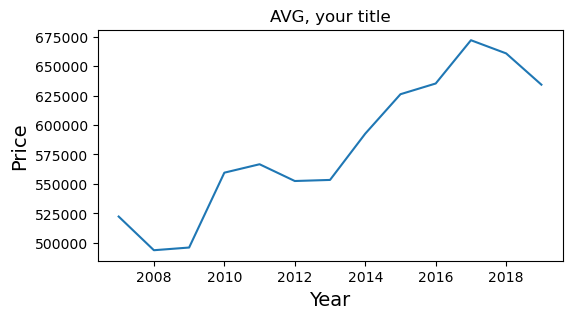

In [19]:
# 시간의 변동에 따라서 추세를 확인
# 선 그래프
fig, ax = plt.subplots(figsize=(6, 3)) # 도화지 영역

# x축 : result.index 값 y축 : result.values 값
ax.plot(result.index, result.values) # 시각화 큰 틀 영역


# 상단 제목 설정
# size에 따라 글자의 크기가 달라진다
# 한글 폰트의 경우 깨져서 나오므로 별도로 지정을 해야한다
# 코드 순서 주의 !!

# 세부 옵션
ax.set_title('AVG, your title', size=12)
ax.set_xlabel('Year', size=14)
ax.set_ylabel('Price', size=14)

# 그래프 파일 저장하기
plt.savefig('output/matplotlib01.png')

# 그래프 그리기
plt.show()

## 막대 그래프 

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

sales = pd.read_csv('data/raw_sales.csv', parse_dates=['datesold'])
sales

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4
1,2007-02-27,2906,290000,house,3
2,2007-03-07,2905,328000,house,3
3,2007-03-09,2905,380000,house,4
4,2007-03-21,2906,310000,house,3
...,...,...,...,...,...
29575,2019-07-25,2900,500000,unit,3
29576,2019-07-25,2612,560000,unit,2
29577,2019-07-26,2912,464950,unit,2
29578,2019-07-26,2601,589000,unit,2


In [53]:
# 월별 막대 그래프를 x축으로 기준
# 2007년, 2008년 병합
# 년도와 달을 의미하는 새로운 칼럼 생성
sales['year'] = sales['datesold'].dt.year
sales['month'] = sales['datesold'].dt.month

# 첫번째 레코드(= 0번 인덱스 행) 출력
sales.head(1)

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2


In [22]:
# df = sales vs df = sales.copy()
# 둘의 가장 큰 차이점은 어떤 메모리를 참조하느냐이다
# df = sales 코드의 경우 df는 sales가 참조하는 메모리와 같은 메모리를 참조하게 된다.
# 즉, sales 데이터를 수정하게 되면 df의 데이터도 같이 수정되게 된다.
# 반면, df = sales.copy()의 경우 서로 독립적인 메모리를 참조하므로 sales 데이터를 변경하더라도
# df 변수에는 영향이 없다
df = sales.copy()
df.head(1)

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2


In [25]:
df = df.loc[df['year'].isin([2007, 2008]), :]
df.tail()

,datesold,postcode,price,propertyType,bedrooms,year,month
24611,2008-12-16,2601,279000,unit,1,2008,12
24612,2008-12-22,2603,350000,unit,2,2008,12
24613,2008-12-23,2606,315000,unit,2,2008,12
24614,2008-12-24,2606,400000,unit,3,2008,12
24615,2008-12-24,2612,440000,unit,2,2008,12


In [54]:
# np.round(n) 메소드 : 소수점 n자리까지 반올림 하여 표현
# n을 입력하지 않은 경우 default : 0
# pandas.DataFrame.agg
result = np.round(df.groupby(['year', 'month'])['price'].agg("mean"), 1)
result.reset_index()

# 만약 3개월로 끊어서 가져오고 싶은경우 아래와 같이 작성할 수 있다
# 시작인덱스~끝인덱스까지 step을 3으로 해서 가져옴
# iloc는 stop을 포함하지 않는다는 것 다시 복기하기 !
result.reset_index().iloc[::3, :]

,year,month,price
0,2007,2,407500.0
3,2007,5,339500.0
6,2007,8,505608.7
9,2007,11,505442.3
12,2008,2,531080.0
15,2008,5,522394.7
18,2008,8,449510.4
21,2008,11,489546.3


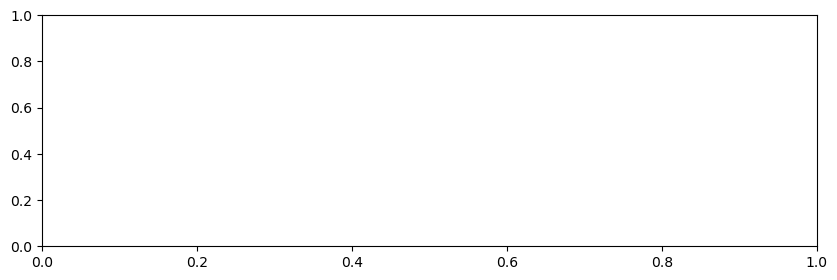

In [56]:
# OOP style code
fig, ax = plt.subplots(figsize = (10, 3))

In [61]:
result = result.reset_index()
result['year'].unique()

array([2007, 2008], dtype=int32)

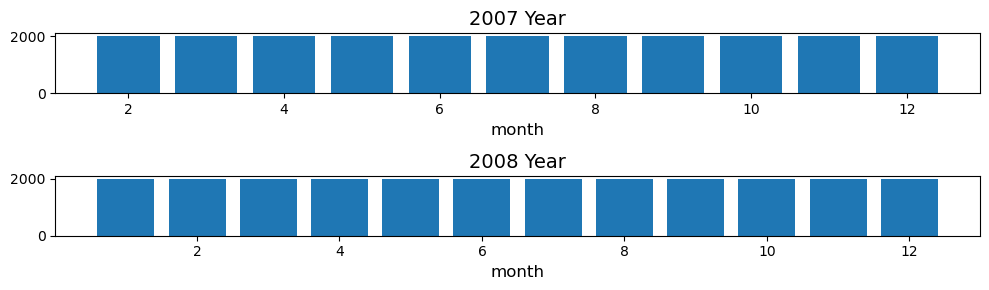

In [77]:
result_2007 = result.loc[result['year'] == 2007, :]
result_2008 = result.loc[result['year'] == 2008, :]

fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 3))

ax[0].bar(result_2007['month'], result_2007['year'])
ax[1].bar(result_2008['month'], result_2008['year'])

# ax[indexNum] 별로 옵션을 줄 수 있다.
# ax[indexNum] 별로 상단의 제목 설정
ax[0].set_title('2007 Year', size = 14)
ax[1].set_title('2008 Year', size = 14)

ax[0].set_xlabel('month', size = 12)
ax[1].set_xlabel('month', size = 12)

# 그래프의 간격을 떨어뜨림
plt.tight_layout()

# 그래프 출력
plt.show()

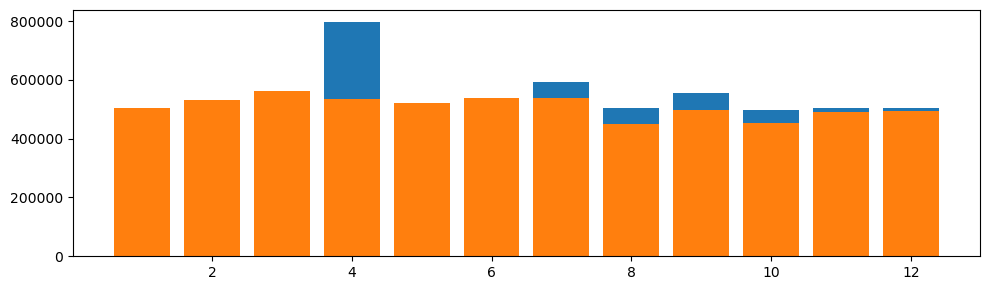

In [81]:
# 기본 도화지 세팅
fig, ax = plt.subplots(figsize = (10, 3))

# 그래프 그리기
ax.bar(result_2007['month'], result_2007['price'])
ax.bar(result_2008['month'], result_2008['price'])

# 간격 띄우기
plt.tight_layout()

# 그래프 보여주기
plt.show()


# Question : 왜 색깔이 다르게 나오는지?